tenemos demasiadas features, dimensiones, quiero reducir la dimensionalidad utilizando PCA y eliminando algunas features que considero innecesarias a raiz del EDA

In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA 
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
scaled_data = pd.read_csv('./data/df_scaled_data.csv')
scaled_data

,Unnamed: 0,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,Response,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Dt_Customer_hours
0,0,-0.020999,-0.985345,-0.458383,0.235327,-0.825218,-0.929894,0.307039,0.983781,1.551577,...,2.388846,-0.029894,-0.036621,-0.339909,-0.792406,1.914854,-0.591099,-0.188676,-0.029894,-1.531185
1,1,-1.053058,-1.235733,-0.458383,-0.235826,1.032559,0.906934,-0.383664,-0.870479,-0.636301,...,-0.418612,-0.029894,-0.036621,-0.339909,-0.792406,1.914854,-0.591099,-0.188676,-0.029894,1.190545
2,2,-0.447070,-0.317643,-0.458383,0.773633,-0.825218,-0.929894,-0.798086,0.362723,0.570804,...,-0.418612,-0.029894,-0.036621,-0.339909,-0.792406,-0.522233,1.691765,-0.188676,-0.029894,0.205773
3,3,0.181716,1.268149,-0.458383,-1.022732,1.032559,-0.929894,-0.798086,-0.870479,-0.560857,...,-0.418612,-0.029894,-0.036621,-0.339909,-0.792406,-0.522233,1.691765,-0.188676,-0.029894,1.061881
4,4,-0.082614,1.017761,1.533425,0.241519,1.032559,-0.929894,1.550305,-0.389085,0.419916,...,-0.418612,-0.029894,-0.036621,-0.339909,1.261980,-0.522233,-0.591099,-0.188676,-0.029894,0.953012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2235,1.625983,-0.150717,-0.458383,0.358568,-0.825218,0.906934,-0.107383,1.203678,0.419916,...,-0.418612,-0.029894,-0.036621,-0.339909,1.261980,-0.522233,-0.591099,-0.188676,-0.029894,-0.135680
2236,2236,-0.490200,-1.903435,1.533425,0.470064,2.890335,0.906934,0.237969,0.303291,-0.661449,...,-0.418612,-0.029894,-0.036621,-0.339909,-0.792406,-0.522233,1.691765,-0.188676,-0.029894,1.655713
2237,2237,0.516905,1.017761,-0.458383,0.189106,-0.825218,-0.929894,1.446700,1.795020,0.545656,...,-0.418612,-0.029894,-0.036621,2.941967,-0.792406,-0.522233,-0.591099,-0.188676,-0.029894,0.982703
2238,2238,0.814199,-1.068807,0.537521,0.679035,-0.825218,0.906934,-1.419719,0.368666,0.092992,...,-0.418612,-0.029894,-0.036621,-0.339909,-0.792406,-0.522233,1.691765,-0.188676,-0.029894,0.977755


In [4]:
scaled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               2240 non-null   int64  
 1   ID                       2240 non-null   float64
 2   Year_Birth               2240 non-null   float64
 3   Education                2240 non-null   float64
 4   Income                   2240 non-null   float64
 5   Kidhome                  2240 non-null   float64
 6   Teenhome                 2240 non-null   float64
 7   Recency                  2240 non-null   float64
 8   MntWines                 2240 non-null   float64
 9   MntFruits                2240 non-null   float64
 10  MntMeatProducts          2240 non-null   float64
 11  MntFishProducts          2240 non-null   float64
 12  MntSweetProducts         2240 non-null   float64
 13  MntGoldProds             2240 non-null   float64
 14  NumDealsPurchases       

In [5]:
scaled_data.drop(['Unnamed: 0', 'ID', 'Response'], axis= 1, inplace= True)

In [6]:
pca = PCA(n_components= 2)
data_pca = pca.fit_transform(scaled_data)

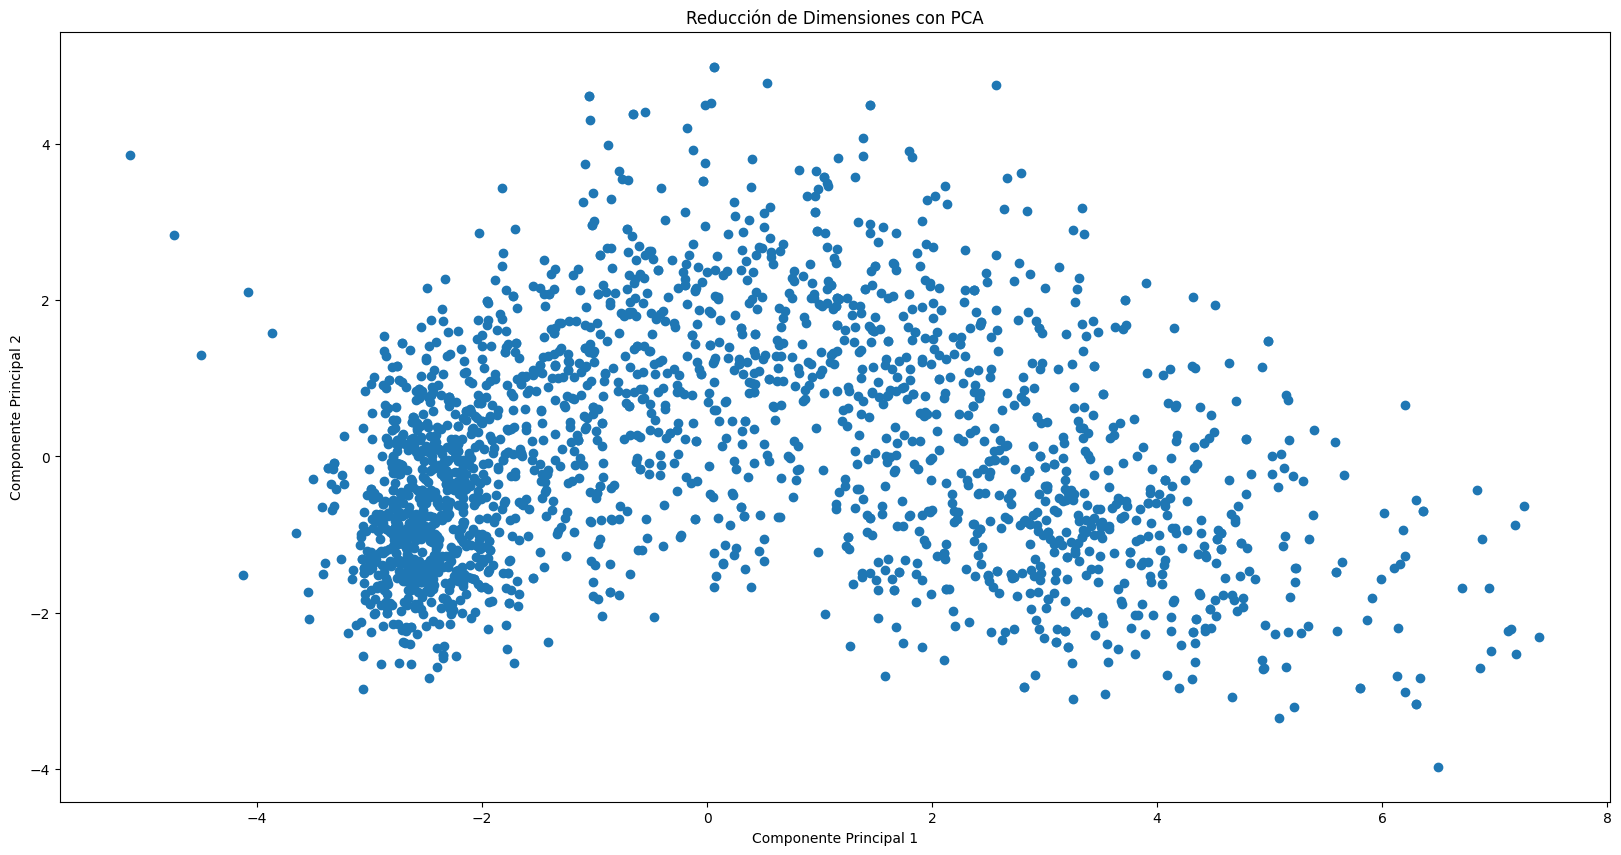

In [7]:
plt.figure(figsize= (20, 10))
plt.scatter(data_pca[:, 0], data_pca[:, 1])
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Reducción de Dimensiones con PCA')
plt.show()

# parece todo bastante junto en verdad

ahora aplicamos el dbscan para encontrar los clusters

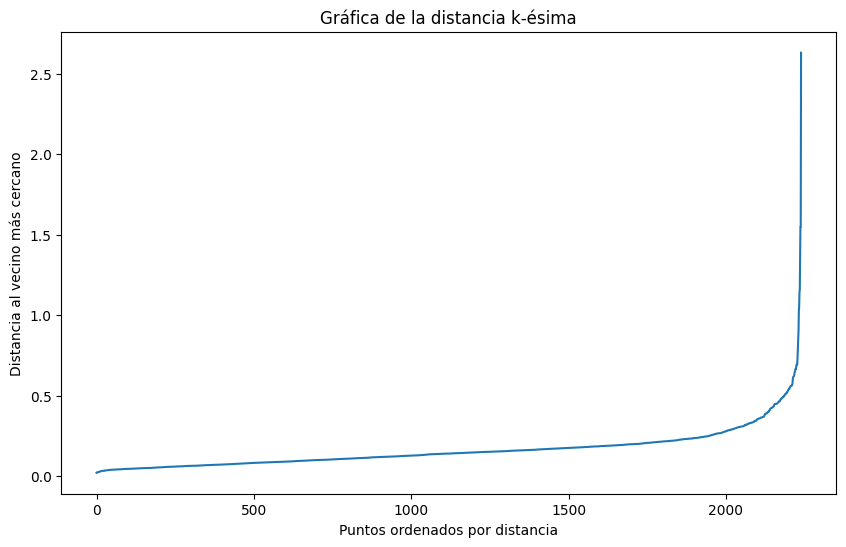

In [8]:
'''
para hacer una clusterizacion optima debemos definir los valores para los marametros eps y min_samples adecuados
min_samples elegire 5. En la red he encontrado que es un valor comunmente utilizado para datas de dos dimensiones
para eps voy a estudiar lo puntos mas alejados al punto core. a saber:

.- voy a aplicar eps entre 0.1 y 1 con saltos de 0.1
.- voy a aplicar una cantidad de vecinos dentro de la circunferencia de radio eps = 5 (aqui contamos el punto core(central))
.- con nearestneighbors voy a seleccionar estos 5 puntos dentro de la circunferencia y sus distancias con el punto core (la primera distancia sera 0 porque la distancia de core de si mismo es 0, obvio)
.- voy a seleccionar de todos los indices (puntos core de estudio) las distancias mas largas, osea la distancia al punto mas lejano
.- ordenamos ese array resultante y graficamos la linea para buscar el codo, y ese punto de codo con mayor pendiente marcara la epsilon adecuada, la distancia(eps) donde los clusteres comenzarian a estar demasiado expandidos
'''

neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(data_pca)
distances, indices = nbrs.kneighbors(data_pca)

# Ordenar las distancias y graficarlas
distances = np.sort(distances[:, 4], axis=0)
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel('Puntos ordenados por distancia')
plt.ylabel('Distancia al vecino más cercano')
plt.title('Gráfica de la distancia k-ésima')
plt.show()

In [9]:
'''
encontrar el codo no es tan facil a simple vista en verda
he encontrado una libreria "kneed" pensada para encontrar este dato y la utilizare en mi estudio
concretamente la funcion KneeLocator especificada en la misma
'''

from kneed import KneeLocator

kneedle = KneeLocator(range(1, len(distances) + 1), distances, curve='convex', direction='increasing')
optimal_eps = distances[kneedle.knee - 1]  
print(f'eps optimo -> {optimal_eps}')

# da un resultado similar a la celda siguiente y eso me tranquiliza, la diferencia es que la siguiente celda es poco mas que un copia pega y en esta celda se lo que estoy haciendo

eps optimo -> 1.548139609011076


In [10]:
'''
ESTE ES OTRO METODO PARA CALCULAR EL EPSILON ADECUADO PERO NO TERMINO DE SENTIRME CONFIADO CON EL. ME CUESTA ENTRENDERLO AUN DESPUES DE ESTUDIARLO, DEBO TRABAJARLO MAS Y NO TENGO TIEMPO. EN CONSECUENCIA LO OBVIO.
LA UNICA RAZON POR LA QUE DEJO ESTA CELDA AQUI ES PARA DENOTAR QUE LO HE TRABAJADO AUNQUE HAYA SIDO DESECHADO AL FINAL

from sklearn.metrics import silhouette_score

eps_values = np.linspace(0.1, 1.0, 10)
min_samples_values = range(2, 10)

# Almacenar los resultados
best_eps = None
best_min_samples = None
best_score = -1

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(data_pca)
        
        # Ignorar configuraciones donde todos los puntos son considerados ruido
        if len(set(labels)) > 1:
            score = silhouette_score(data_pca, labels)
            # Usar otras métricas si es necesario:
            # score = davies_bouldin_score(X_pca, labels)
            
            if score > best_score:
                best_eps = eps
                best_min_samples = min_samples
                best_score = score

print(f'Mejor eps: {best_eps}')
print(f'Mejor min_samples: {best_min_samples}')
print(f'Mejor score: {best_score}')'''

"\nESTE ES OTRO METODO PARA CALCULAR EL EPSILON ADECUADO PERO NO TERMINO DE SENTIRME CONFIADO CON EL. ME CUESTA ENTRENDERLO AUN DESPUES DE ESTUDIARLO, DEBO TRABAJARLO MAS Y NO TENGO TIEMPO. EN CONSECUENCIA LO OBVIO.\nLA UNICA RAZON POR LA QUE DEJO ESTA CELDA AQUI ES PARA DENOTAR QUE LO HE TRABAJADO AUNQUE HAYA SIDO DESECHADO AL FINAL\n\nfrom sklearn.metrics import silhouette_score\n\neps_values = np.linspace(0.1, 1.0, 10)\nmin_samples_values = range(2, 10)\n\n# Almacenar los resultados\nbest_eps = None\nbest_min_samples = None\nbest_score = -1\n\nfor eps in eps_values:\n    for min_samples in min_samples_values:\n        dbscan = DBSCAN(eps=eps, min_samples=min_samples)\n        labels = dbscan.fit_predict(data_pca)\n        \n        # Ignorar configuraciones donde todos los puntos son considerados ruido\n        if len(set(labels)) > 1:\n            score = silhouette_score(data_pca, labels)\n            # Usar otras métricas si es necesario:\n            # score = davies_bouldin_sco

In [11]:
# vamos ya a sacar los clusteres aqui a ver que nos encontramos
dbscan = DBSCAN(eps= 0.6, min_samples=5)
labels = dbscan.fit_predict(data_pca)

In [12]:
clusters = set(labels) # a ver las etiquetas/cluesteres que ha encontrado esto
clusters

# solo 2 clusteres? (-1 es ruido) no me gusta en verdad

{-1, 0, 1}

In [13]:
df_data = pd.DataFrame(data_pca, columns= ['X1', 'X2'])

In [14]:
df_data['cluster'] = labels

<Axes: xlabel='X1', ylabel='X2'>

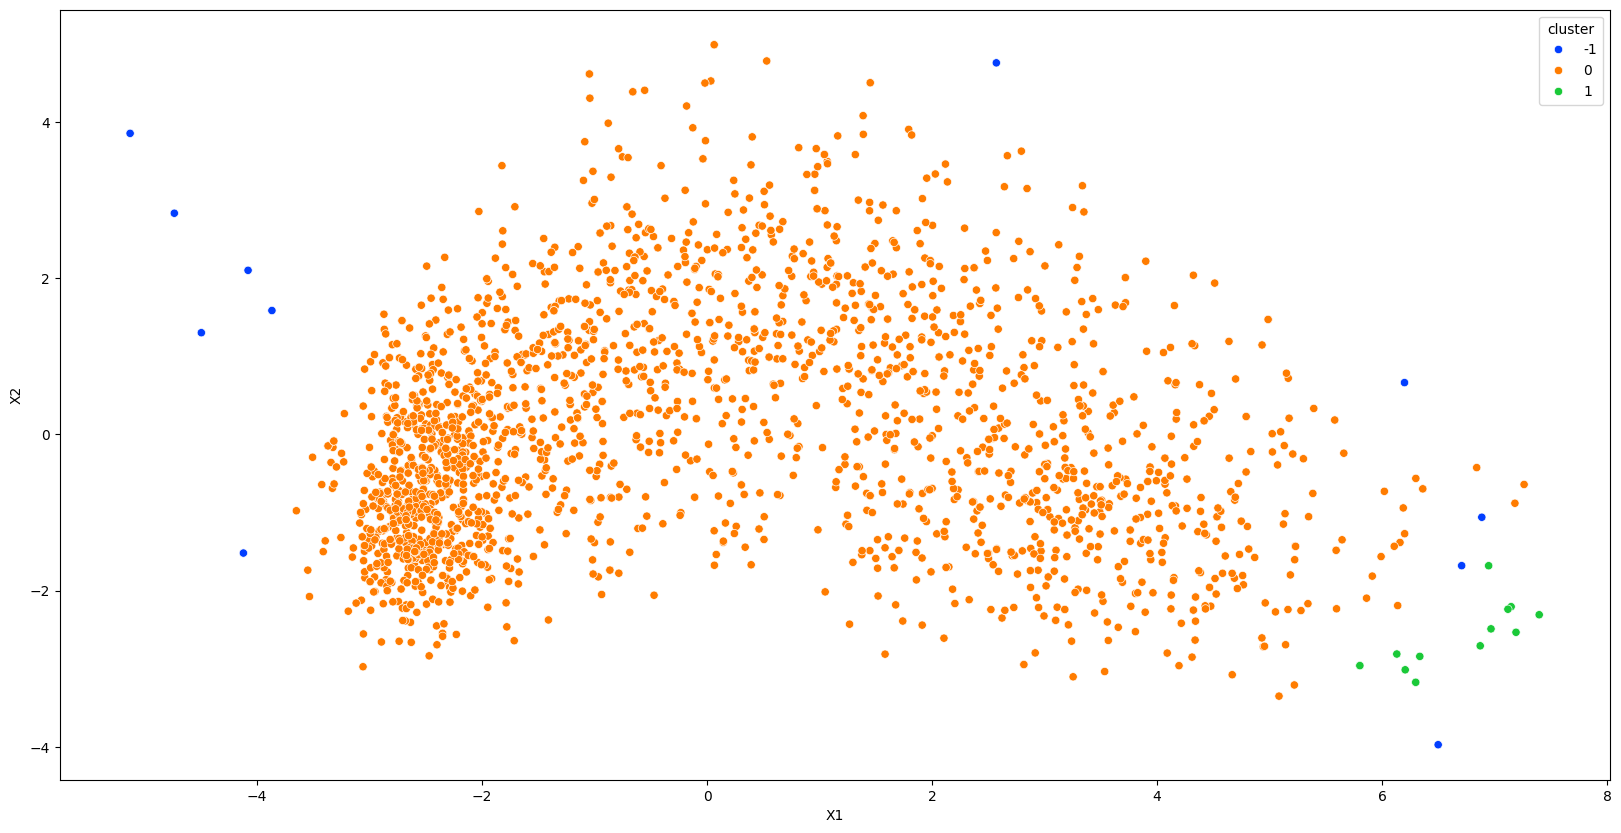

In [15]:
# vamos a graficar los clusters

plt.figure(figsize= (20, 10))
sns.scatterplot(df_data, x= 'X1', y= 'X2', hue= 'cluster', palette= 'bright')

In [16]:
df_data['cluster'].value_counts()

cluster
 0    2215
 1      14
-1      11
Name: count, dtype: int64

no me gusta esta clusterizacion, es muy amplia, y uno de los clusteres apenas tiene instancias pocos clusters no me parece de gran ayuda

voy a hacer una clusterizacion reduciendo la cantidad de min_samples en el dbscan, quiero segmentar mas el mercado

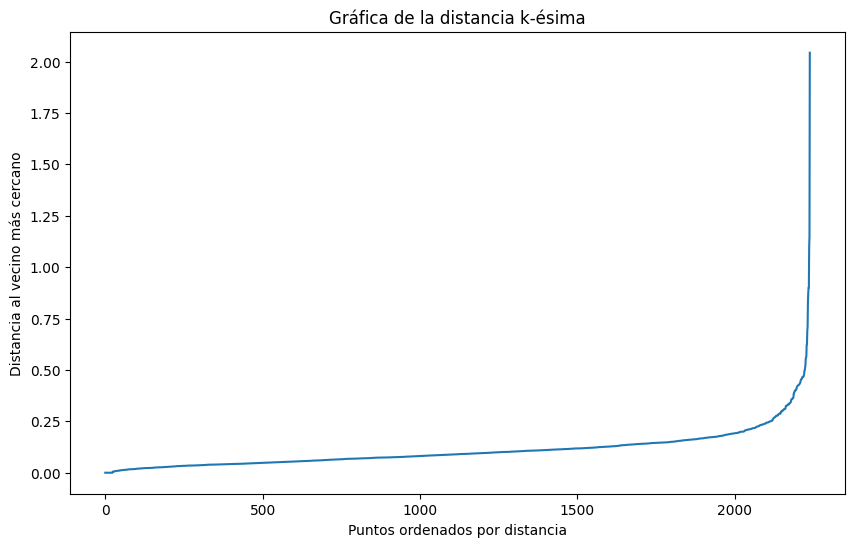

In [17]:
neigh = NearestNeighbors(n_neighbors=3)
nbrs = neigh.fit(data_pca)
distances, indices = nbrs.kneighbors(data_pca)

# Ordenar las distancias y graficarlas
distances = np.sort(distances[:, 2], axis=0)
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel('Puntos ordenados por distancia')
plt.ylabel('Distancia al vecino más cercano')
plt.title('Gráfica de la distancia k-ésima')
plt.show()

In [18]:
kneedle = KneeLocator(range(1, len(distances) + 1), distances, curve='convex', direction='increasing')
optimal_eps = distances[kneedle.knee - 1]  
print(f'eps optimo -> {optimal_eps}')

eps optimo -> 0.4668544421147101


In [19]:
dbscan = DBSCAN(eps= optimal_eps, min_samples=2)
labels = dbscan.fit_predict(data_pca)

<Axes: xlabel='X1', ylabel='X2'>

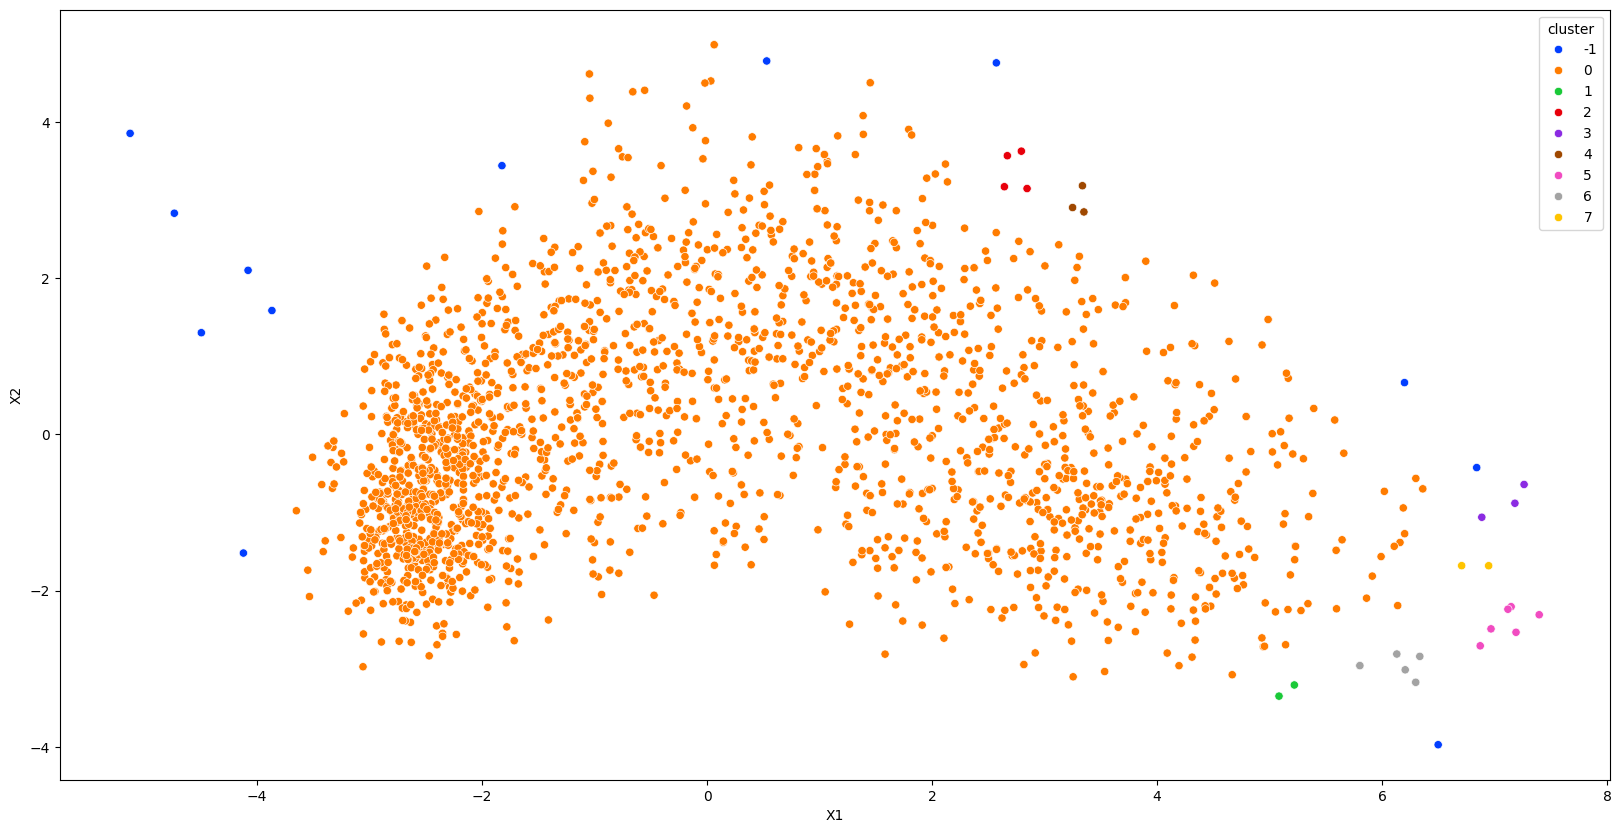

In [20]:
df_data = pd.DataFrame(data_pca, columns= ['X1', 'X2'])
df_data['cluster'] = labels

plt.figure(figsize= (20, 10))
sns.scatterplot(df_data, x= 'X1', y= 'X2', hue= 'cluster', palette= 'bright')

In [21]:
df_data['cluster'].value_counts()

cluster
 0    2201
-1      12
 6       7
 5       6
 2       4
 3       3
 4       3
 1       2
 7       2
Name: count, dtype: int64

no es fruto de mi devocion, hay clusteres practicamente inucuos con apenas instancias, pero al menos aqui podemos segmentar algo mas el mercado

vamos a intentar interpretar esto en otro archivo

In [22]:
df_data['cluster'].to_csv('./data/df_cluster_data.csv', index= False) #quiero guardar el indice para unirlo al data original que descargue en su momento y mirar sus datos acorde al cluster que le toca